## Business Understanding

### Overview

A car hire business also refered to as a car rental business provides vehicles for short-term use, usually ranging from a few hours to several days or weeks, to customers who require temporary transportation. This business is necessary in catering to individuals or businesses who do not own a car, those who need an extra vehicle for travel, or people who require specific types of vehicles for particular occasions. Car hire businesses are often part of the larger transportation and travel industries, serving both local and international customers. The car hire business operates by renting out a fleet of vehicles, often located at various rental locations, such as airports, train stations, or urban centers. These businesses offer a variety of vehicles ranging from economy cars to luxury cars, SUVs, vans, and trucks depending on customer demand. Some companies may also specialize in niche markets like luxury car rentals, wedding cars, or electric vehicle rentals.

### Business Problem

V magic Limited company now sees all the big companies diversifying to car rental business and they want to get in on the fun. They have to decide which cars to purchase depending on make, model, fuel consumption, emissions etc. I am charged with exploring what model and make of cars that are currently doing the best at the car rental industry. I must then translate those findings into actionable insights that the head of the company's car rental session can use to help him decide what type of make and model of cars to purchase. 

### Objectives

 1.	Analyze vehicle performance across different makes and models, through assesment of the fuel efficiency and engine size
 
 2. Identify the most popular vehicle classes for car rental business by examining the relationship between vehicle class and rental market demand.

 3. Evaluate the cost and environmental impact of potential fleet vehicles using fuel consumption and emissions.
 
 4. Perform a comparative analysis of vehicle makes and models.

 5. Analyze the relationship between transmission type and fuel consumption to determine how different transmission types impact the fuel efficiency of vehicles.

 6. Evaluate the relationship between Fuel type and Emissions.

## Data Understanding

### Data Source
For this project, we are working with a dataset that was sourced from [Kaggle](https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption), the dataset contains information on a variety of vehicles, focusing on attributes such as make, model, vehicle class, engine size, fuel consumption, emissions, and other key features that are relevant for analyzing the performance and suitability of cars for a car hire business.

### Data Description
The dataset includes the following key attributes:

1. Year: The model year of the vehicle.
2. Make: The manufacturer or brand of the vehicle. 
3. Model: The specific model of the vehicle. 
4. Vehicle Class: The category or class of the vehicle.
5. Engine Size: The size of the engine in liters.
6. Cylinders: The number of cylinders in the engine.
7. Transmission: The type of transmissiontic.
8. Fuel: The type of fuel used by the vehicle.
9. Fuel Consumption: The fuel consumption in liters per 100 kilometers.
10. Highway Fuel Consumption (HWY): Fuel consumption on the highway in liters per 100 kilometers.
11. Combined Fuel Consumption (COMB): The combined fuel consumption (city + highway) in liters per 100 kilometers.
12. Combined Fuel Economy (COMB MPG): The combined fuel economy in miles per gallon.
13. Emissions: The CO2 emissions of the vehicle in grams per kilometer.

## Data Preparation

### Importing libraries and reading the dataset

In [86]:
# Importing the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [87]:
# reading the dataset and printing the first 5 rows
df = pd.read_csv("Fuel_Consumption_2000_2022.csv")
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [88]:
df.shape
type(df)
df.columns

print(f"The shape of the dataset is {df.shape}")
print(f"\nThe type of the dataset is {type(df)}")
print(f"\nThe dataset columns are {df.columns}")

The shape of the dataset is (22556, 13)

The type of the dataset is <class 'pandas.core.frame.DataFrame'>

The dataset columns are Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')


In [89]:
# Title-case column names and then assign it back to df.columns
df.columns = df.columns.str.title()
# Preview
print(f"The dataset columns after title-case are {df.columns}")

The dataset columns after title-case are Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size', 'Cylinders',
       'Transmission', 'Fuel', 'Fuel Consumption', 'Hwy (L/100 Km)',
       'Comb (L/100 Km)', 'Comb (Mpg)', 'Emissions'],
      dtype='object')


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              22556 non-null  int64  
 1   Make              22556 non-null  object 
 2   Model             22556 non-null  object 
 3   Vehicle Class     22556 non-null  object 
 4   Engine Size       22556 non-null  float64
 5   Cylinders         22556 non-null  int64  
 6   Transmission      22556 non-null  object 
 7   Fuel              22556 non-null  object 
 8   Fuel Consumption  22556 non-null  float64
 9   Hwy (L/100 Km)    22556 non-null  float64
 10  Comb (L/100 Km)   22556 non-null  float64
 11  Comb (Mpg)        22556 non-null  int64  
 12  Emissions         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


## Exploratory Data Analysis

### Data Cleaning, Identifying and handling issues in the dataset that is:

1. Checking for missing values, Filling or removing missing data.
2. Cheking for duplicate records, Identifying and removing duplicate rows.
3. Performing Univariate Analysis and Bivariate
4. Checking and Removing outliers


In [91]:
# checking for any missing values
df.isna().sum() # our dataset has no missing values


Year                0
Make                0
Model               0
Vehicle Class       0
Engine Size         0
Cylinders           0
Transmission        0
Fuel                0
Fuel Consumption    0
Hwy (L/100 Km)      0
Comb (L/100 Km)     0
Comb (Mpg)          0
Emissions           0
dtype: int64

In [92]:
# checking for duplicates
df.duplicated().sum() # we have one duplicated row

1

In [93]:
# dropping the duplicated row and previewing
df.drop_duplicates(keep='first', inplace=True)
# Preview
print("DataFrame after dropping duplicates:")
print(df.duplicated().sum())

DataFrame after dropping duplicates:
0


# Univariante Analysis

In [94]:
# checking for the statistical distrution of numerical columins
df.describe()

,Year,Engine Size,Cylinders,Fuel Consumption,Hwy (L/100 Km),Comb (L/100 Km),Comb (Mpg),Emissions
count,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000,22555.000000
mean,2011.554955,3.356617,5.854046,12.763294,8.918958,11.034148,27.374950,250.063844
std,6.297939,1.335448,1.819582,3.500922,2.274675,2.910839,7.376881,59.352558
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.700000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [95]:
# defining our numerical columns
numerical_col = ["Engine Size", "Cylinders", "Fuel Consumption", "Hwy (L/100 Km)", "Comb (L/100 Km)", "Comb (Mpg)", "Emissions"]

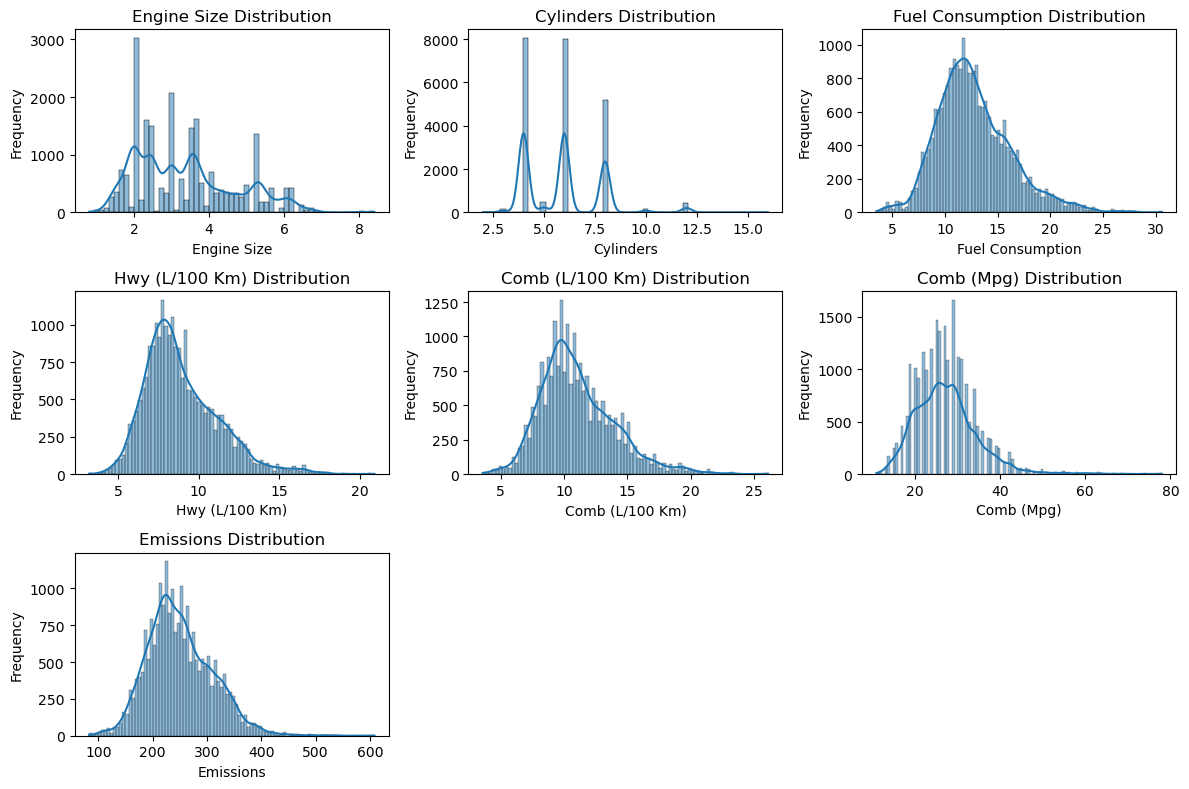

In [96]:
# Plot histograms for all the numerical columns
plt.figure(figsize=(12, 8))

# Creating histograms for each numerical column
for i, col in enumerate(numerical_col):
    plt.subplot(3, 3, i+1)  
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [97]:
# Calculating the IQR for each numerical variable
Q1 = df[numerical_col].quantile(0.25)
Q3 = df[numerical_col].quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers using IQR method
outliers = ((df[numerical_col] < (Q1 - 1.5 * IQR)) | (df[numerical_col] > (Q3 + 1.5 * IQR)))
outliers_sum = outliers.sum()

# Print the number of outliers for each column
print(outliers_sum)


Engine Size          41
Cylinders            12
Fuel Consumption    552
Hwy (L/100 Km)      509
Comb (L/100 Km)     548
Comb (Mpg)          495
Emissions           218
dtype: int64


In [98]:
# Defining the IQR bounds for each column
Q1 = df[numerical_col].quantile(0.25)
Q3 = df[numerical_col].quantile(0.75)
IQR = Q3 - Q1

# This checks if each value is within the IQR range for all columns in numerical_col
df1 = df[~((df[numerical_col] < (Q1 - 1.5 * IQR)) | (df[numerical_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Displaying the shape of the new dataset to see how many rows were removed
print("Original dataset shape:", df.shape)
print("New dataset shape after removing outliers:", df1.shape)


Original dataset shape: (22555, 13)
New dataset shape after removing outliers: (21376, 13)


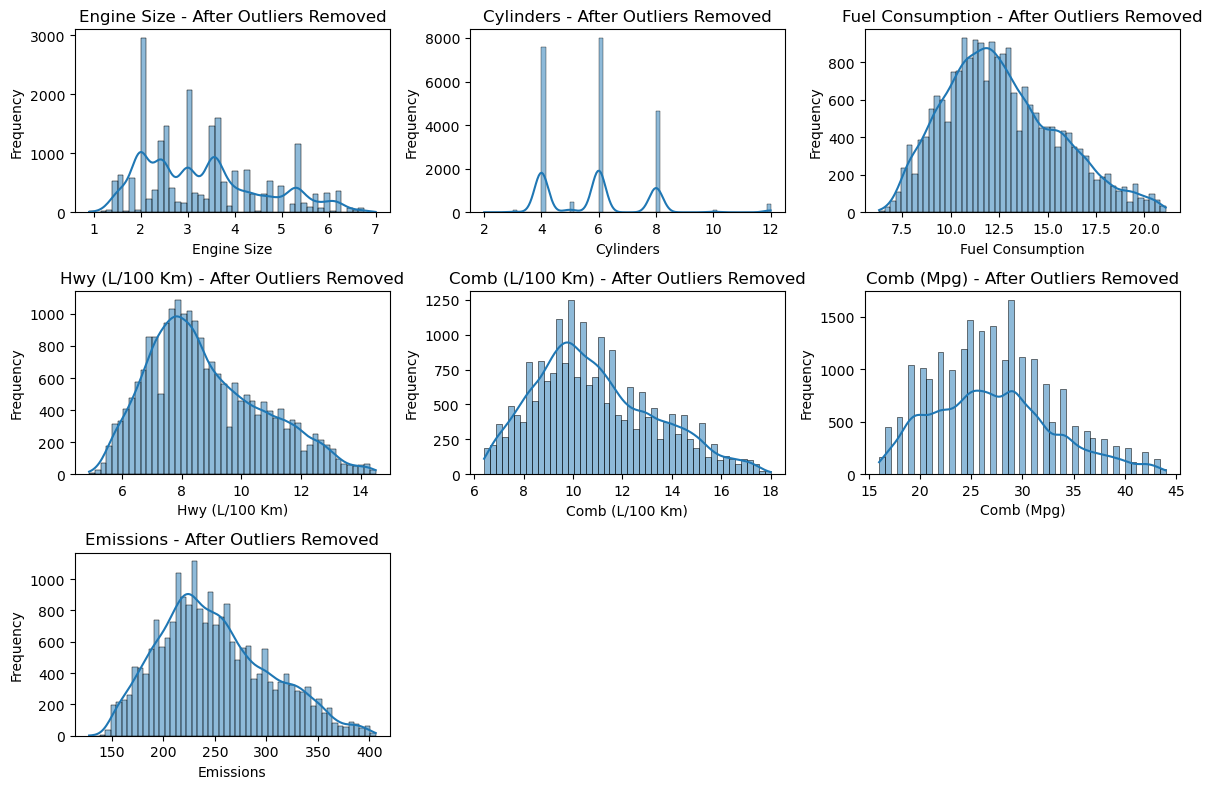

In [99]:
# To preview our visualizaton if outliers were dropped
# Ploting histograms for all numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_col):
    # Ploting the histogram 
    plt.subplot(3, 3, i+1) 
    sns.histplot(df1[col], kde=True)
    plt.title(f'{col} - After Outliers Removed')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

This graph above shows the univariate distributions of key vehicle features after outlier removal, with each histogram overlaid by a (Kernel Density Estimation) KDE line for smoother visualization. The KDE lines closely fit the histograms, indicating that each feature follows expected distributions without distortion from extreme values.

1. Engine Size: Peaks around 2-3 liters, with fewer large engines, showing typical values without extreme skew.
2. Cylinders: Multimodal distribution, peaking at 4, 6, and 8 cylinders—common configurations in vehicles.
3. Fuel Consumption: Slight right skew, with most vehicles around 10-12 L/100 km, indicating moderate fuel efficiency.
4. Fuel Efficiency (L/100 km, MPG): L/100 km is right-skewed, MPG is left-skewed, both indicating a typical efficiency range.
5. Emissions: Roughly normal, centered around 250-300, focusing on typical values without outliers.
6. KDE Fit: In most cases, KDE lines closely match histogram bars, suggesting well-distributed data patterns without extreme outlier influence. 

In [100]:
# List of columns for which to print value counts
columns = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel']

# Loop through each column then print value counts
for column in columns:
    print(f"\nValue counts for '{column}':")
    print(df[column].value_counts())



Value counts for 'Make':
Make
CHEVROLET        1725
BMW              1490
GMC              1357
FORD             1276
MERCEDES-BENZ     935
                 ... 
ALFA ROMEO          8
SRT                 4
GENESIS             4
BUGATTI             3
PLYMOUTH            2
Name: count, Length: 87, dtype: int64

Value counts for 'Model':
Model
JETTA          89
MUSTANG        88
RANGER         61
SENTRA         58
ALTIMA         57
               ..
Optima FE       1
ARNAGE RL       1
BROOKLANDS      1
335d SEDAN      1
XC60 B6 AWD     1
Name: count, Length: 4242, dtype: int64

Value counts for 'Vehicle Class':
Vehicle Class
SUV                         2639
COMPACT                     2636
MID-SIZE                    2300
PICKUP TRUCK - STANDARD     1689
SUBCOMPACT                  1559
FULL-SIZE                   1086
TWO-SEATER                   999
SUV: Small                   929
SUV - SMALL                  827
MINICOMPACT                  783
STATION WAGON - SMALL        737
Mid-si

#### We drop Vehicle class with a popularity of less than 100

In [101]:
# Step 1: Identify categories with less than 100 entries
counts = df1['Vehicle Class'].value_counts()
categories_to_drop = counts[counts < 100].index

# Step 2: Filter the DataFrame to keep only rows with 100 etries or more
df2 = df1[~df['Vehicle Class'].isin(categories_to_drop)]

# Check the new shape to confirm rows were removed
print("Original shape:", df1.shape)
print("New shape after filtering:", df2.shape)


Original shape: (21376, 13)
New shape after filtering: (21169, 13)


### Bivariate Analysis

####
It is a Statistical analysis that explores the relationship that exist between two variables. Correlation coefficient is one  of the main techniques that is used in bivariate analysis to understand the relationship between two variables. 

<Axes: >

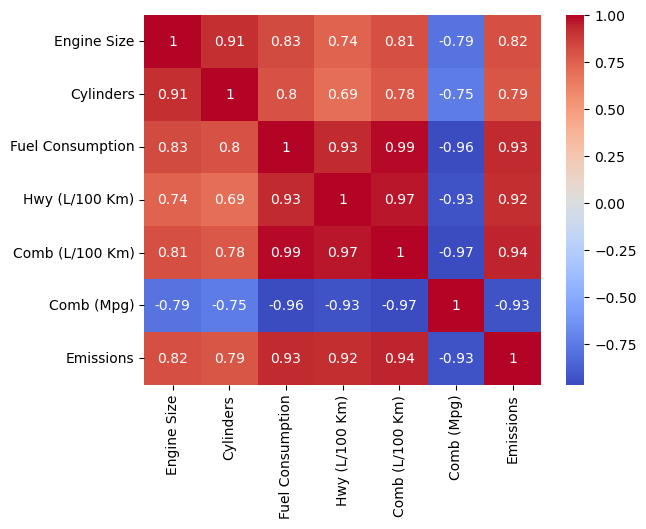

In [102]:
correlation_matrix = df2[['Engine Size', 'Cylinders', 'Fuel Consumption', 'Hwy (L/100 Km)', 'Comb (L/100 Km)', 'Comb (Mpg)', 'Emissions']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#### The above diagram shows the correlation coefficient between varies variables. The close the value to +1 or -1 the greater the association. For instance: 

1. Fuel Consumption and Comb (L/100 Km) has a correlation coefficient of +0.99 meaning it is a strong positive correlation. Fuel consumption and combined fuel consumption (Comb L/100 Km) are almost perfectly positively correlated

2. Comb (MPG) and Comb (L/100 Km) has a Correlation Coefficient: -0.97 a strong negative correlation. Combined miles per gallon (MPG) and combined liters per 100 km (L/100 Km) have a strong negative correlation. 

### Data Visualization

#### Visualization according to variables in relation to objectives

Analyze vehicle performance across different makes and models, through assesment of the fuel efficiency and engine size

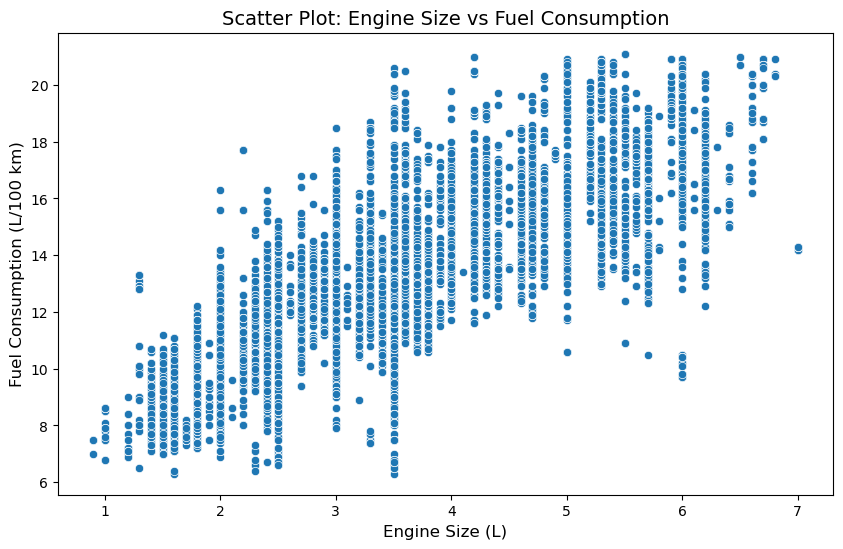

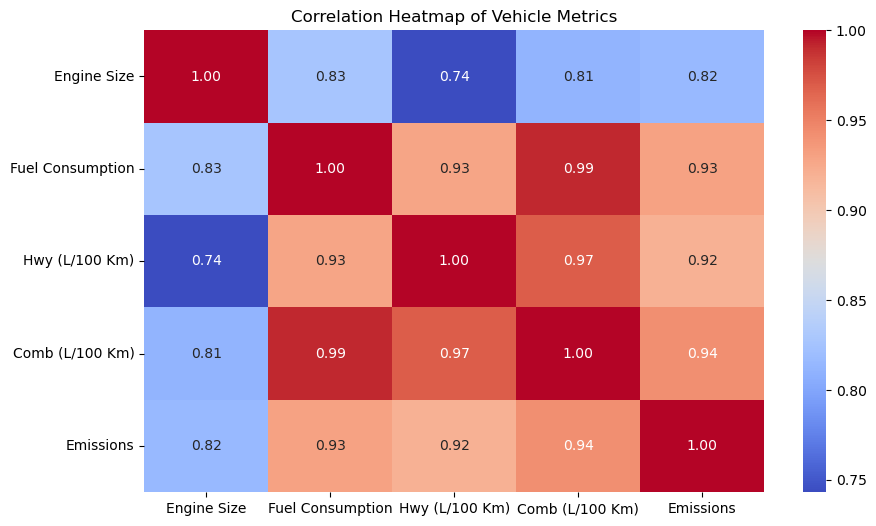

In [103]:
# plot graph
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Engine Size', y='Fuel Consumption', data=df2)
plt.title('Scatter Plot: Engine Size vs Fuel Consumption', fontsize=14)
plt.xlabel('Engine Size (L)', fontsize=12)
plt.ylabel('Fuel Consumption (L/100 km)', fontsize=12)

# Show the p
plt.figure(figsize=(10, 6))
corr_matrix = df2[['Engine Size', 'Fuel Consumption', 'Hwy (L/100 Km)', 'Comb (L/100 Km)', 'Emissions']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Vehicle Metrics')
plt.show()

### Identify the most popular vehicle classes for car rental business by examining the relationship between vehicle class and rental market demand.

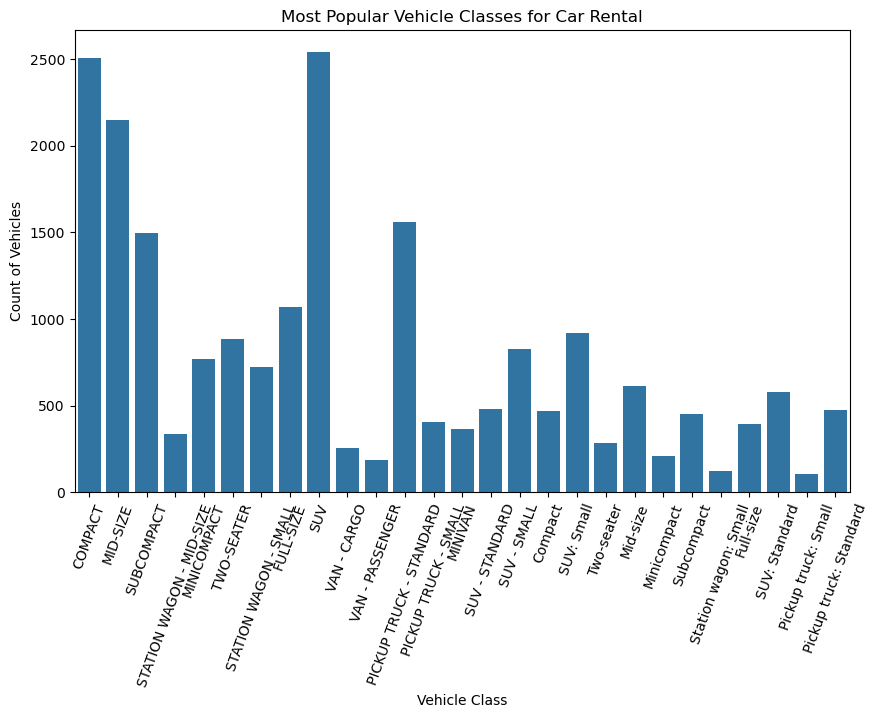

In [104]:
# plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle Class', data=df2)
plt.title('Most Popular Vehicle Classes for Car Rental')
plt.xlabel('Vehicle Class')
plt.ylabel('Count of Vehicles')
plt.xticks(rotation=70)
plt.show()


#### Evaluate the cost and environmental impact of potential fleet vehicles using fuel consumption and emissions.

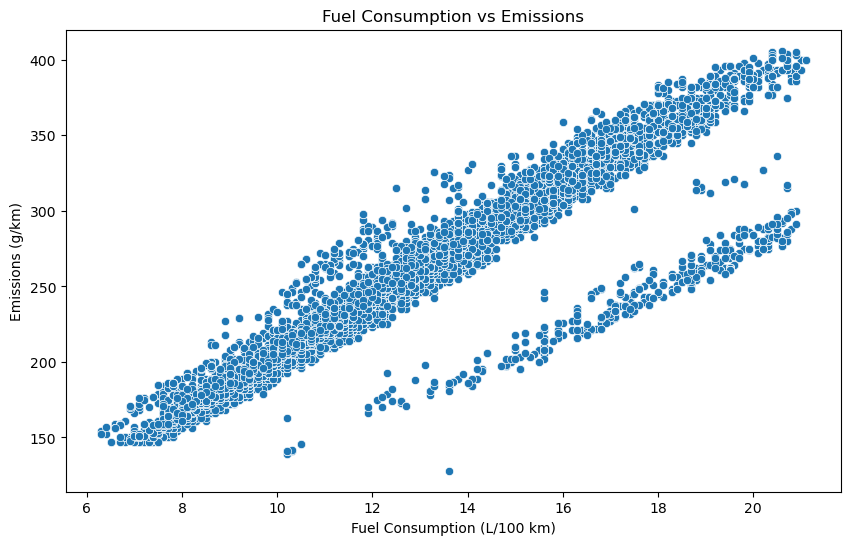

In [105]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fuel Consumption', y='Emissions', data=df2, palette='coolwarm')
plt.title('Fuel Consumption vs Emissions')
plt.xlabel('Fuel Consumption (L/100 km)')
plt.ylabel('Emissions (g/km)')
plt.show()


#### Perform a comparative analysis of vehicle makes and models

Visualize the average Fuel Consumption across different Makes of vehicles.

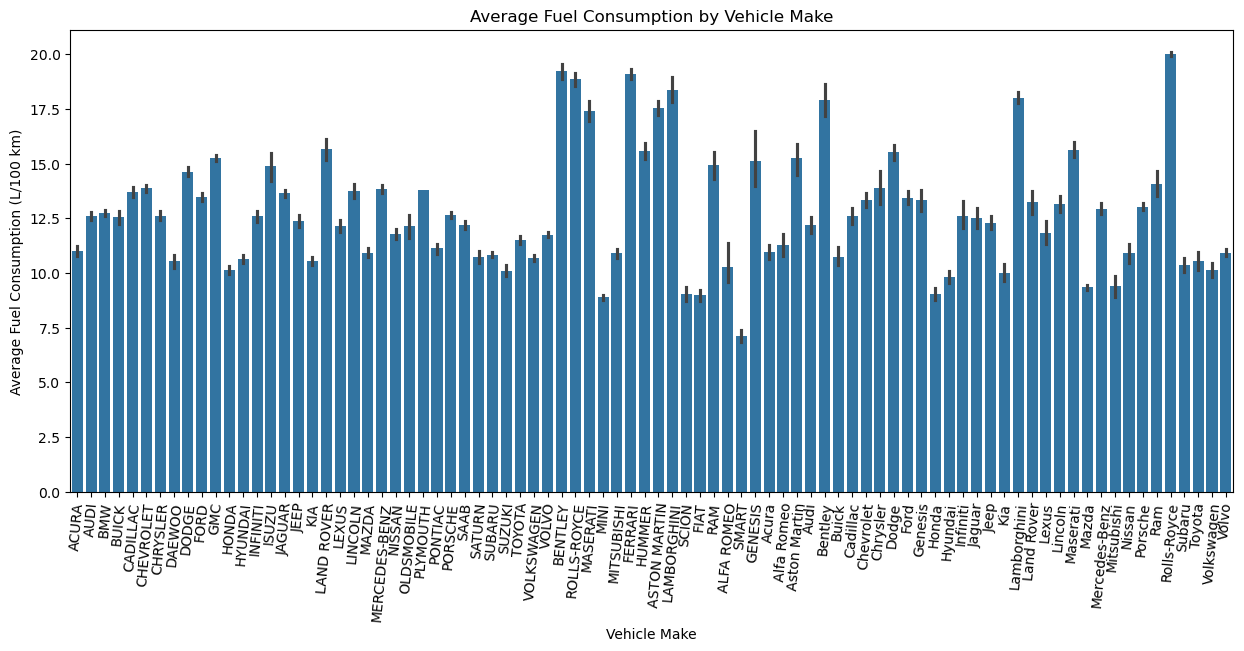

In [106]:
# Ploting
plt.figure(figsize=(15, 6))
sns.barplot(x='Make', y='Fuel Consumption', data=df2)
plt.title('Average Fuel Consumption by Vehicle Make')
plt.xlabel('Vehicle Make')
plt.ylabel('Average Fuel Consumption (L/100 km)')
plt.xticks(rotation=85)
plt.show()


 Analyze the relationship between transmission type and fuel consumption to determine how different transmission types impact the fuel efficiency of vehicles.

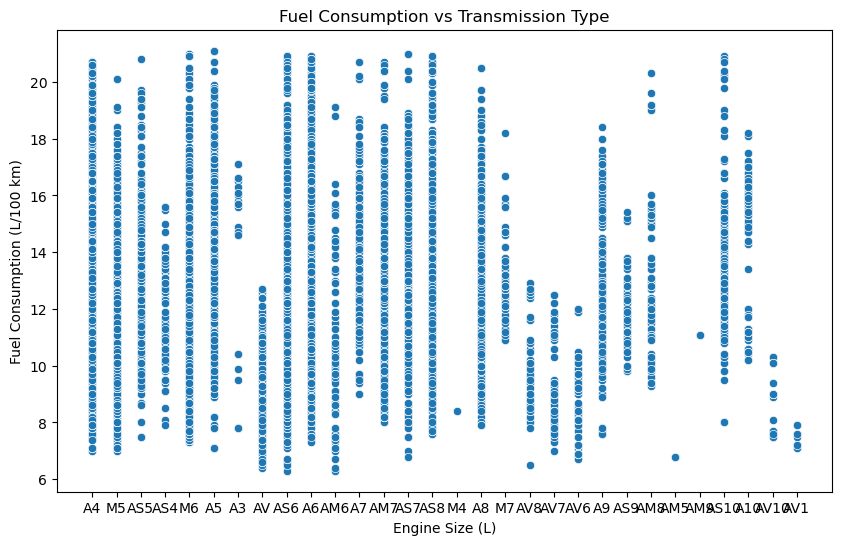

In [107]:
# Ploting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Transmission', y='Fuel Consumption', data=df2)
plt.title('Fuel Consumption vs Transmission Type')
plt.xlabel('Engine Size (L)')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.show()


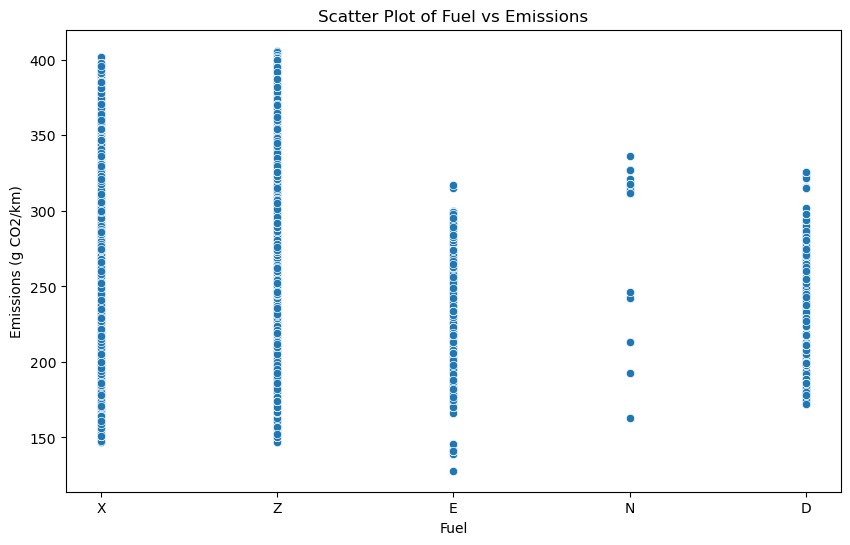

In [108]:
#plot FueL vs emission
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='Fuel', y='Emissions', data=df2)
plt.xlabel('Fuel')
plt.ylabel('Emissions (g CO2/km)')
plt.title('Scatter Plot of Fuel vs Emissions')
plt.show()

### Trend analysis for our variables

#### Fuel Consumption Over the Years

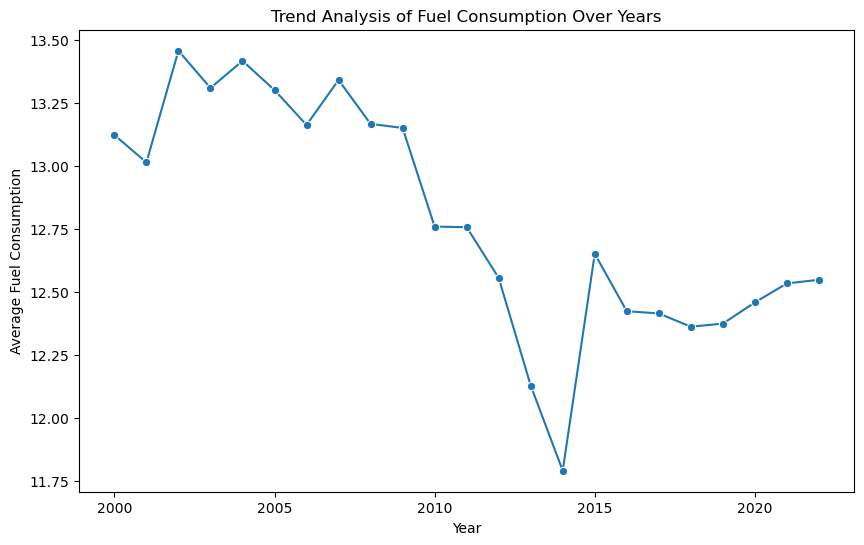

In [109]:
# Grouping by 'Year' to get the average fuel consumption
yearly_trend = df.groupby('Year')['Fuel Consumption'].mean()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_trend, marker='o')
plt.title('Trend Analysis of Fuel Consumption Over Years')
plt.xlabel('Year')
plt.ylabel('Average Fuel Consumption')
plt.show()


#### Trend analysis for Emission Over the years

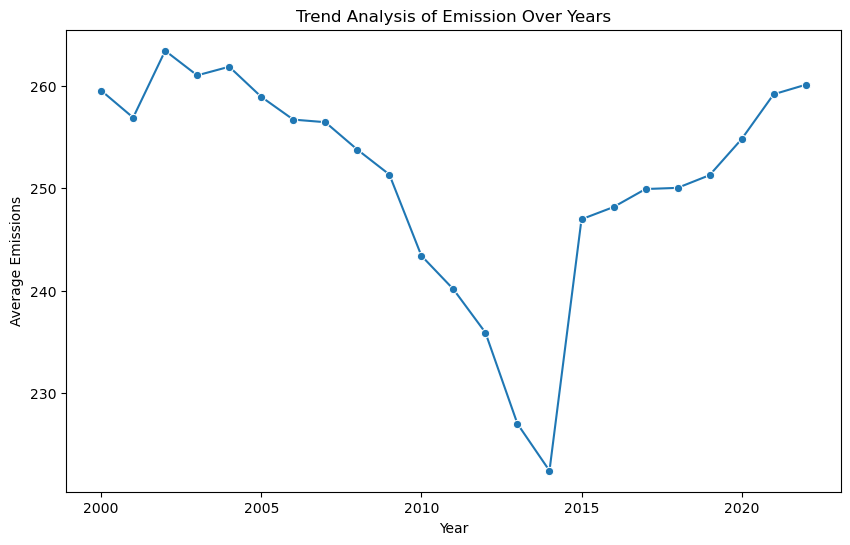

In [110]:
# Grouping by 'Year' to get the average emission
yearly_trend = df.groupby('Year')['Emissions'].mean()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_trend, marker='o')
plt.title('Trend Analysis of Emission Over Years')
plt.xlabel('Year')
plt.ylabel('Average Emissions')
plt.show()


#### Trend analysis for Transmission vs Fuel Consumption

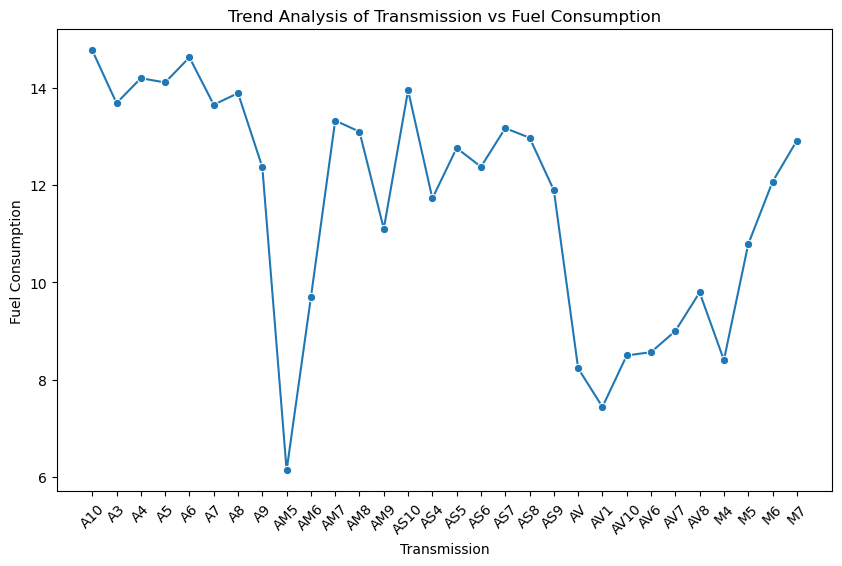

In [111]:
# Grouping by 'Transmission' vs Fuel Consumption
yearly_trend = df.groupby('Transmission')['Fuel Consumption'].mean()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_trend, marker='o')
plt.title('Trend Analysis of Transmission vs Fuel Consumption')
plt.xlabel('Transmission')
plt.ylabel('Fuel Consumption')
plt.xticks(rotation=45)
plt.show()

#### Trend analysis of Fuel vs Emission

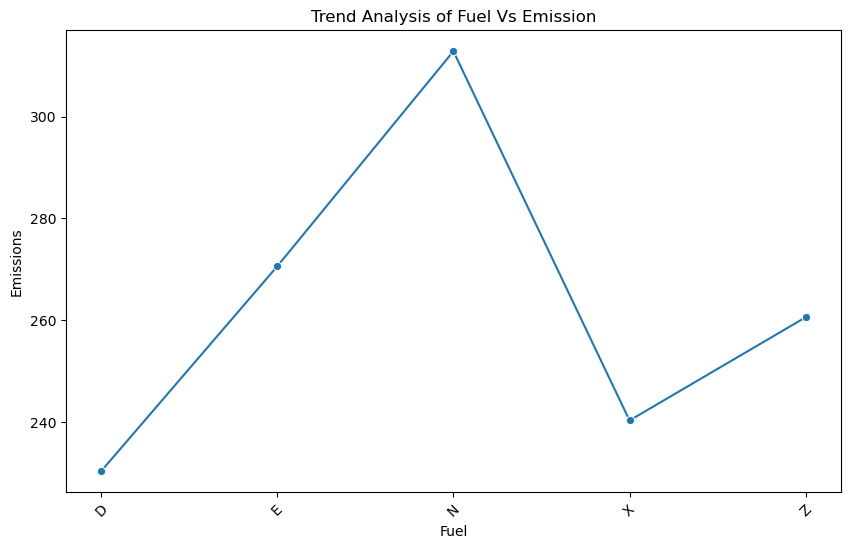

In [112]:
# Grouping by 'Fuel' vs Emissions
yearly_trend = df.groupby('Fuel')['Emissions'].mean()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_trend, marker='o')
plt.title('Trend Analysis of Fuel Vs Emission')
plt.xlabel('Fuel')
plt.ylabel('Emissions')
plt.xticks(rotation=45)
plt.show()

## Modelling and Evaluation

### Statistical Analysis

#### Analyze vehicle performance across different makes and models, through assesment of the fuel efficiency and engine size

#### Stating Hypothesis

1. Null Hypothesis (H₀):
There is no significant relationship between engine size and fuel efficiency (measured by fuel consumption) across different vehicle makes and models in terms of their engine size.

2. Alternative Hypothesis (H₁):
There is a significant relationship between engine size and fuel efficiency (measured by fuel consumption) across different vehicle makes and models in terms of their engine size.

To test if there is a significant relationship between Fuel efficiency and Engine size we use linear regression model

In [113]:
# Define X, y
X = df2['Engine Size'] 
y = df2['Fuel Consumption'] 

# Add a constant 
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Fuel Consumption   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                 4.575e+04
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:59:18   Log-Likelihood:                -40605.
No. Observations:               21169   AIC:                         8.121e+04
Df Residuals:                   21167   BIC:                         8.123e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.3072      0.032    199.627      

### Key Model Statistics Interpretation

•	R-squared is 0.684 - this is an indication that 68.4% of the variance in fuel consumption is explained by engine size. This is a reasonably high R-squared, suggesting a strong linear relationship between engine size and fuel consumption.

•	Adjusted R-squared is 0.684 - the adjusted R-squared is nearly identical to the R-squared value, showing that adding engine size as the only predictor provides a good fit to the data.

•	F-statistic is 4.575e+04 with a p-value of 0.000 - The high F-statistic with a p-value of 0.000 suggests that the model is statistically significant as a whole, meaning that including engine size in the model significantly improves the fit.

### Coefficients
•	Constant (Intercept) is 6.3072, the intercept represents the predicted fuel consumption when the engine size is zero.

•	Engine Size Coefficient is 1.8970 meaning for every 1 unit increase in engine size, fuel consumption increases by 1.897 L/100 km, holding other variables constant. The p-value for this coefficient is 0.000, which is well below the common significance threshold (e.g., 0.05).

### Hypothesis Test Conclusion
Since the p-value for the engine size coefficient is highly significant (0.000), we ***reject the null hypothesis*** in favor of the alternative hypothesis. This means that there is strong evidence to suggest a significant relationship between engine size and fuel consumption.


In [114]:
# Calculating mean fuel consumption and engine size for each make and model
average_fuel_engine = df2.groupby(['Make', 'Model'])[['Fuel Consumption', 'Engine Size']].mean()

# Sort by ascending
sorted_fuel_engine = average_fuel_engine.sort_values(by=['Fuel Consumption', 'Engine Size'])

# Select the top 10
top_10_fuel_engine = sorted_fuel_engine.head(10)

# Print the results
print(top_10_fuel_engine)

                                                Fuel Consumption  Engine Size
Make    Model                                                                
Hyundai Tucson Hybrid                                   6.300000     1.600000
LEXUS   RX 450h                                         6.300000     3.500000
Kia     Sorento Hybrid AWD                              6.400000     1.600000
SCION   iQ                                              6.500000     1.300000
FORD    ESCAPE HYBRID                                   6.533333     2.300000
Toyota  Highlander Hybrid AWD Limited/Platinum          6.600000     2.500000
TOYOTA  HIGHLANER HYBRID 4WD                            6.600000     3.500000
KIA     OPTIMA HYBRID EX                                6.700000     2.400000
FORD    ESCAPE HYBRID AWD                               6.800000     2.433333
TOYOTA  RAV4 HYBRID AWD                                 6.900000     2.500000


### Evaluate the cost and environmental impact of potential fleet vehicles using fuel consumption and emissions.

### Stating Hypothesis

Null Hypothesis (H₀): There is no significant relationship between fuel consumption and emissions.

Alternative Hypothesis (H₁): There is a significant relationship between fuel consumption and emissions.

In [115]:
# Define X, y
X = df2['Fuel Consumption']
y = df2['Emissions']         

# Add a constant 
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the  model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Emissions   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                 1.365e+05
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:59:18   Log-Likelihood:                -92993.
No. Observations:               21169   AIC:                         1.860e+05
Df Residuals:                   21167   BIC:                         1.860e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               35.2681      0.595  

### Key Model Statistics Interpretation

•	R-squared of 0.866 indicates that 86.5% of the variance in emissions is explained by fuel consumption. This is a strong relationship, showing that fuel consumption is a significant predictor of emissions.

•	Adjusted R-squared of 0.866 is very close to the R-squared, indicating that the model is a good fit, and the adjustment for the number of predictors does not significantly change the result.

•	F-statistic of 1.365e+05 is high, suggesting that the overall regression model is highly significant. The p-value for the F-statistic is 0.00, which is much smaller than 0.05, confirming that the model is statistically significant.

### Coefficients
•	The constant (Intercept) is 35.2681 which is the expected emissions value when fuel consumption is zero. 

•	Fuel Consumption has a Coefficient of 16.9685 meaning for each unit increase in fuel consumption, emissions increase by 16.97 units. This indicates a positive relationship between fuel consumption and emissions. The more fuel a vehicle consumes; the more emissions it produces.

### Hypothesis Test Conclusion

 The p-value for fuel consumption is 0.000, which is much smaller than 0.05. This means that fuel consumption has a statistically significant impact on emissions,  we therefore ***reject the null hypothesis*** that states that there is no relationship.


In [116]:
# Calculate mean fuel consumption and emissions for each make and model
average_fuel_emissions = df2.groupby(['Make', 'Model'])[['Fuel Consumption', 'Emissions']].mean()

# Sort by ascending 
sorted_fuel_emissions = average_fuel_emissions.sort_values(by=['Fuel Consumption', 'Emissions'])

# Select the top 10
top_10_fuel_emissions = sorted_fuel_emissions.head(10)

# Print
print(top_10_fuel_emissions)


                                                Fuel Consumption   Emissions
Make    Model                                                               
Hyundai Tucson Hybrid                                   6.300000  152.000000
LEXUS   RX 450h                                         6.300000  154.000000
Kia     Sorento Hybrid AWD                              6.400000  157.000000
SCION   iQ                                              6.500000  147.000000
FORD    ESCAPE HYBRID                                   6.533333  154.666667
Toyota  Highlander Hybrid AWD Limited/Platinum          6.600000  156.000000
TOYOTA  HIGHLANER HYBRID 4WD                            6.600000  159.000000
KIA     OPTIMA HYBRID EX                                6.700000  148.500000
FORD    ESCAPE HYBRID AWD                               6.800000  162.000000
TOYOTA  RAV4 HYBRID AWD                                 6.900000  169.500000


### Analyze the relationship between transmission type and fuel consumption to determine how different transmission types impact the fuel efficiency of vehicles.

#### Stating Hypothesis

Null Hypothesis (H₀):
There is no significant relationship between transmission type and fuel consumption.

Alternative Hypothesis (H₁):
There is a significant relationship between transmission type and fuel consumption.

In [117]:
# Grouping data by Transmission type
transmission_groups = df2.groupby('Transmission')['Fuel Consumption'].apply(list)

# Perform ANOVA to compare the means of fuel consumption across transmission types
f_statistic, p_value = stats.f_oneway(*transmission_groups)

# Print results
print(f"F-statistic: {f_statistic}")
print(f"\nP-value: {p_value}")

F-statistic: 146.0181492594985

P-value: 0.0


### Key Model Statistics Interpretation

F-statistic (146.02): The F-statistic is large, meaning that the differences in fuel consumption between the different transmission types are significantly greater than the differences within each transmission type. This suggests that transmission type has a strong impact on fuel consumption.

P-value (0.0): The P-value is 0.0, which is much smaller than the typical threshold of 0.05. This indicates that the likelihood of the result occurring by chance is almost zero.

### Hypothesis Test Conclusion
Since the P-value is less than 0.05, we ***reject the null hypothesis***. This means there is a significant relationship between transmission type and fuel consumption, implying that the type of transmission used in the vehicle affects how much fuel it consumes.

#### Analysing the most fuel efficient type of transmission

In [118]:
# Calculating the mean fuel consumption of make, model, and transmission type
average_fuel_consumption = df2.groupby(['Make', 'Model', 'Transmission'])['Fuel Consumption'].mean()

# Sorting by asce fuel consumption
sorted_transmissions = average_fuel_consumption.sort_values()

# Select the top 10 
top_10_transmissions = sorted_transmissions.head(10)

# Print
print(top_10_transmissions)



Make     Model                                   Transmission
Hyundai  Tucson Hybrid                           AM6             6.300000
LEXUS    RX 450h                                 AS6             6.300000
Kia      Sorento Hybrid AWD                      AM6             6.400000
SCION    iQ                                      AV              6.500000
FORD     ESCAPE HYBRID                           AV              6.533333
Toyota   Highlander Hybrid AWD Limited/Platinum  AV              6.600000
TOYOTA   HIGHLANER HYBRID 4WD                    AV              6.600000
LEXUS    RX 450h AWD                             AS6             6.675000
KIA      OPTIMA HYBRID EX                        AS6             6.700000
Toyota   Highlander Hybrid AWD                   AV              6.700000
Name: Fuel Consumption, dtype: float64


### To analyse the effect of fuel type on emissions

### Stating Hypothesis

Null Hypothesis (H₀):
The fuel type has no effect on vehicle emissions.

Alternative Hypothesis (H₁):
The fuel type has a significant effect on vehicle emissions.

In [119]:
# Group emissions by fuel type
fuel_groups = df2.groupby('Fuel')['Emissions'].apply(list)

# Performing ANOVA
f_statistic, p_value = stats.f_oneway(*fuel_groups)

# Printing results
print(f"F-statistic: {f_statistic}")
print(f"\nP-value: {p_value}")

F-statistic: 88.04204831175458

P-value: 2.5002249274713306e-74


### Key Model Statistics Interpretation

F-statistic is 88.04 this is quite large; it suggests that the variation between the emissions of different fuel types is much larger than the variation within each fuel type. This implies that the fuel type likely has a strong effect on emissions.

The p-value of 2.5-74 which is basically zero is less than the 0.05. This provides strong evidence against the null hypothesis.

### Hypothesis Test Conclusion

Since the p-value is much less than 0.05, we ***reject the null hypothesis***, concluding that there is a significant relationship between fuel type and emissions.


## Recommedation 

1.	Since fuel consumption is significantly influenced by engine size, V Magic should consider smaller engine sizes for better fuel efficiency. Lower fuel consumption translates to lower operational costs, which can improve profit margins, especially if fuel expenses are a large part of rental overhead.

2.	Choose vehicles with lower fuel consumption to minimize emissions. The analysis clearly shows that higher fuel consumption leads to higher emissions. By selecting fuel-efficient vehicles, V Magic can reduce its environmental impact, aligning with sustainability goals and appealing to eco-conscious customers.

3.	Based on the data, the Hyundai Tucson Hybrid AM6 transmission is the best choice with the lowest fuel consumption (6.80 L/100 km). This means it uses the least fuel for the same distance, offering the most cost-effective operation. Transmission types like AV1, M4, and AV10 follow closely in terms of fuel efficiency, making them strong candidates as well.

4. Prioritize Low-Emission Fuel Types, since fuel type considerably impacts emissions, select vehicles that use fuels associated with lower emissions.             